<h1>Analyzing Lending Club Data</h1>

This notebook is an exercise in data exploration and data analysis using Lending Club Data. The Lending Club (https://www.lendingclub.com/) is an online platform that enables borrowers to apply for loans and investors to fund those loans while earning interest. 

I explore two type of analyses: linear and logistic regression. 


This analysis is part of Thinkful's course on Data Science (https://www.thinkful.com/courses/learn-data-science-online/). 

<h2>Linear Regression</h2>

<p>The objective of the linear regession analysis is to determine whether there is a linear relationship between the user's FICO score & loan amount requested and the interest rate they receive. </p>

<h3>Loading the Data</h3>

I load my libraries first. Matplotlib will be used for simple data visualizations like histograms and scatter plots. Pandas will be used to structure my data into data frames and manipulate my data. Statsmodelsapi and Numpy are used for linear regression functions.

This data is an abridged version of a larger data set provided by Thinkful. 

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np
import math
from sklearn.linear_model import LogisticRegression

In [51]:
# read data into dataframe
loansData = pd.read_csv("https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv")
loansData

Amount.Requested  Amount.Funded.By.Investors Interest.Rate  \
81174              20000                    20000.00         8.90%   
99592              19200                    19200.00        12.12%   
80059              35000                    35000.00        21.98%   
15825              10000                     9975.00         9.99%   
33182              12000                    12000.00        11.71%   
62403               6000                     6000.00        15.31%   
48808              10000                    10000.00         7.90%   
22090              33500                    33450.00        17.14%   
76404              14675                    14675.00        14.33%   
15867               7000                     7000.00         6.91%   
94971               2000                     2000.00        19.72%   
36911              10625                    10625.00        14.27%   
41200              28000                    27975.00        21.67%   
83869              35000                    34950.00         8.90%   
53853               9600                     9600.00         7.62%   
21399              25000                    24975.00        15.65%   
62127              10000                    10000.00        12.12%   
23446              14000                    13900.25        10.37%   
44987              10000                    10000.00         9.76%   
17977               5200                     5175.00         9.99%   
86099              22000                    21975.00        21.98%   
99483              30000                    30000.00        19.05%   
28798               6500                     6500.00        17.99%   
24168              17400                    17400.00        11.99%   
10356               4000                     4000.00        16.82%   
46027               7200                     7200.00         7.90%   
2238                8000                     8000.00        14.42%   
65278               8000                     8000.00        15.31%   
4227                3000                     3000.00         8.59%   
50182              14500                    14500.00         7.90%   
...                  ...                         ...           ...   
84265              20000                    20000.00        22.95%   
80231              19000                    19000.00         7.90%   
49533              17300                    17250.00        22.45%   
102514              7000                      711.54        15.13%   
78618               7200                     7200.00        18.75%   
86953              10000                    10000.00        14.09%   
80129               4000                     3925.00        14.09%   
85216              17500                    17500.00         8.90%   
38247              20000                    20000.00        11.71%   
91245              16200                    16200.00        15.80%   
53041              10000                    10000.00         6.03%   
63051              27000                    27000.00         6.62%   
14446               4500                     4475.00         7.51%   
68628              15875                    15875.00        14.33%   
98758              15000                    15000.00        10.16%   
13070              25000                    24950.00        10.75%   
45836               7000                     7000.00        17.27%   
52330              15000                    15000.00        19.99%   
48243              17000                    17000.00        15.81%   
63256              19075                    19075.00        18.75%   
42124              10000                    10000.00        11.71%   
78043               8475                     8475.00         7.62%   
925                 6400                     6350.00        10.08%   
74047              30000                    30000.00        23.28%   
49957              24000                    23975.00        14.65%   
23735             

I look at a summary of my data, including mean and standard deviation, as well as the types of data structures I have. Some columns of data will need to modified before I explore for patterns. It's helpful to first understand the types of structure I'll be dealing with.  

In [8]:
loansData.describe()

Amount.Requested  Amount.Funded.By.Investors  Monthly.Income  \
count       2500.000000                 2500.000000     2499.000000   
mean       12406.500000                12001.573236     5688.931321   
std         7801.544872                 7745.320754     3963.118185   
min         1000.000000                   -0.010000      588.500000   
25%         6000.000000                 6000.000000     3500.000000   
50%        10000.000000                10000.000000     5000.000000   
75%        17000.000000                16000.000000     6800.000000   
max        35000.000000                35000.000000   102750.000000   

       Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
count        2498.000000               2498.000000   
mean           10.075661              15244.559648   
std             4.508644              18308.549795   
min             2.000000                  0.000000   
25%             7.000000               5585.750000   
50%             9.000000              10962.000000   
75%            13.000000              18888.750000   
max            38.000000             270800.000000   

       Inquiries.in.the.Last.6.Months  
count                     2498.000000  
mean                         0.906325  
std                          1.231036  
min                          0.000000  
25%                          0.000000  
50%                          0.000000  
75%                          1.000000  
max                          9.000000

In [9]:
loansData.dtypes

Amount.Requested                    int64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

<h3>Cleaning the data</h3>

To clean the data, interest rate, loan length and FICO range need to be numerical values. 

For interest rate, the % needs to be removed and the value needs to be converted from a string to a float.

For loan length, the string "months" needs to be removed and the value needs to be converted to a float.

For FICO score, the values are displayed in ranges and need to be turned into numerical values. The range is first turned into a list with a lower range and an upper range. The lower range is used as the value. Since the range is small, this shouldn't be a problem.


In [10]:
# first 5 rows of Interest.Rate
int_rate = loansData["Interest.Rate"][0:5]
print(int_rate)

# first 5 rows of Loan.Length
loan_len = loansData["Loan.Length"][0:5]
print(loan_len)

# first 5 rows of FICO.Range
fico_range = loansData["FICO.Range"][0:5]
print(fico_range)

81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
Name: Interest.Rate, dtype: object
81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
Name: Loan.Length, dtype: object
81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
Name: FICO.Range, dtype: object


In [11]:
# rstrip removes character at the end of a string 
# float converts to floating point 
# round the number to 4 digits
clean_ir = loansData["Interest.Rate"].map(lambda x: round(float(x.rstrip("%"))/100, 4))
loansData["Interest.Rate"] = clean_ir

In [12]:
# remove months from loans length
clean_loans_length = loansData["Loan.Length"].map(lambda x: float(x.rstrip("months")))
loansData["Loan.Length"] = clean_loans_length

In [13]:
# convert FICO score into numerical value 
# split the range by hyphen 
clean_fico = loansData["FICO.Range"].map(lambda x: x.split("-"))

# make values into a list, only select the first value
clean_fico = clean_fico.map(lambda x: [int(n) for n in x][0])

# change the current values of the column to new variable 
loansData["FICO.Range"] = clean_fico

# rename FICO.Range to FICO.Score
loansData.rename(columns={"FICO.Range": "FICO.Score"}, inplace=True)
print(loansData)


        Amount.Requested  Amount.Funded.By.Investors  Interest.Rate  \
81174              20000                    20000.00         0.0890   
99592              19200                    19200.00         0.1212   
80059              35000                    35000.00         0.2198   
15825              10000                     9975.00         0.0999   
33182              12000                    12000.00         0.1171   
62403               6000                     6000.00         0.1531   
48808              10000                    10000.00         0.0790   
22090              33500                    33450.00         0.1714   
76404              14675                    14675.00         0.1433   
15867               7000                     7000.00         0.0691   
94971               2000                     2000.00         0.1972   
36911              10625                    10625.00         0.1427   
41200              28000                    27975.00         0.2167   
83869 

<h3>Simple Data Exploration</h3>

I use histograms and scatter matrix plot to see any apparent trends. These inital plots show that as FICO score increases, interest rates decreases. And, as monthly income increases, loan amount requested increases.

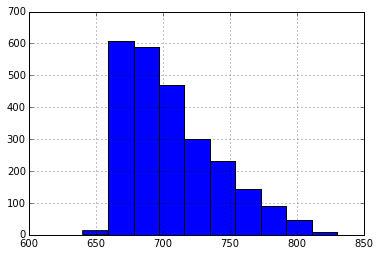

In [14]:
# histogram 
plt.figure()
p = loansData["FICO.Score"].hist()
plt.show()


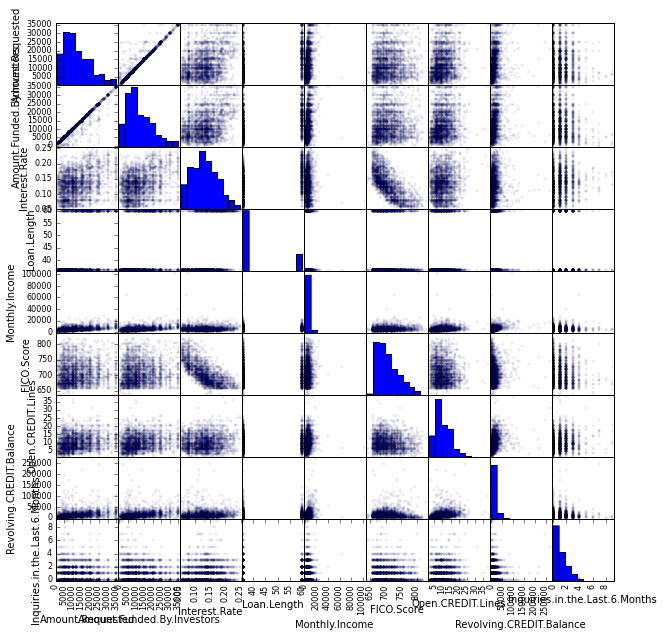

In [15]:
# scatterplot matrix 
pd.scatter_matrix(loansData, alpha=0.05, figsize=(10,10), diagonal="hist")
plt.show()

<h3>Performing the Linear Regression</h3>

<p>To perform the linear regression, the data needs to be reshaped into a 2-D array, or matrix, using the numpy library. The 2-D array will have the FICO score and loan amount requested. The OLS regression is performed using the interest rate as the response variable (Y) and the 2-D array consisting of FICO score and loan amount as the independent variables (x).</p>

In [16]:
intrate = loansData["Interest.Rate"]
loanamt = loansData["Amount.Requested"]
fico = loansData["FICO.Score"]
pd.DataFrame({"intrate": intrate, "loanamt": loanamt, "fico": fico})

fico  intrate  loanamt
81174    735   0.0890    20000
99592    715   0.1212    19200
80059    690   0.2198    35000
15825    695   0.0999    10000
33182    695   0.1171    12000
62403    670   0.1531     6000
48808    720   0.0790    10000
22090    705   0.1714    33500
76404    685   0.1433    14675
15867    715   0.0691     7000
94971    670   0.1972     2000
36911    665   0.1427    10625
41200    670   0.2167    28000
83869    735   0.0890    35000
53853    725   0.0762     9600
21399    730   0.1565    25000
62127    695   0.1212    10000
23446    740   0.1037    14000
44987    730   0.0976    10000
17977    760   0.0999     5200
86099    665   0.2198    22000
99483    695   0.1905    30000
28798    665   0.1799     6500
24168    695   0.1199    17400
10356    670   0.1682     4000
46027    705   0.0790     7200
2238     675   0.1442     8000
65278    675   0.1531     8000
4227     765   0.0859     3000
50182    760   0.0790    14500
...      ...      ...      ...
84265    665   0.2295    20000
80231    770   0.0790    19000
49533    685   0.2245    17300
102514   650   0.1513     7000
78618    660   0.1875     7200
86953    675   0.1409    10000
80129    675   0.1409     4000
85216    730   0.0890    17500
38247    725   0.1171    20000
91245    680   0.1580    16200
53041    760   0.0603    10000
63051    810   0.0662    27000
14446    720   0.0751     4500
68628    675   0.1433    15875
98758    690   0.1016    15000
13070    765   0.1075    25000
45836    665   0.1727     7000
52330    660   0.1999    15000
48243    685   0.1581    17000
63256    670   0.1875    19075
42124    710   0.1171    10000
78043    720   0.0762     8475
925      710   0.1008     6400
74047    675   0.2328    30000
49957    685   0.1465    24000
23735    705   0.1677    30000
65882    740   0.1409    16000
55610    680   0.1399    10000
38576    675   0.1242     6000
3116     670   0.1379     9000

[2500 rows x 3 columns]

In [57]:
# reshape the data 
y = np.matrix(intrate).transpose()
x1 = np.matrix(fico).transpose()
x2 = np.matrix(loanamt).transpose()


In [18]:
# make fico rate and loan amount into a matrix
x = np.column_stack([x1, x2])
print(x)

[[  735 20000]
 [  715 19200]
 [  690 35000]
 ..., 
 [  680 10000]
 [  675  6000]
 [  670  9000]]


In [19]:
# create a linear model 
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()

<h3>Linear Regression Results</h3>

Low p value and high R squared value show that FICO score and loan amount are correlated with interest rates. R squared measures how close data is to the fitted regression line. P value indicates that there is a statistically significant relationship between the variables and response. 

P value is 0, so null hypothesis can be rejected. R squared value is 65.7%.

In [20]:
# summary of regression results 
f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2388.
Date:                Sun, 23 Aug 2015   Prob (F-statistic):               0.00
Time:                        14:51:47   Log-Likelihood:                 5727.6
No. Observations:                2500   AIC:                        -1.145e+04
Df Residuals:                    2497   BIC:                        -1.143e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7288      0.010     73.734      0.000         0.709     0.748
x1            -0.0009    1.4e-05    -63.022      0.000        -0.001    -0.001
x2          2.107e-06    6.3e-08     33.443      0.000      1.98e-06  2.23e-06
==============================================================================
Omnibus:                       69.496   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.811
Skew:                           0.379   Prob(JB):                     1.27e-17
Kurtosis:                       3.414   Cond. No.                     2.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h2>Logistic Regression</h2>

For this logistic regression, we are concerned about the odds of getting a loan for $10,000 at an interest rate less than 12% for a user with a FICO score of 750. We use a logit function (log odds function). A probability (p) of more than 70% means the user will get a loan. We plug in our linear equation into our logistic function. 


<h3>Data Cleaning</h3>

<p>Since a logistic regression is used to determine the odds of whether a user will or will not get a loan, the response is binary (yes/no or 0,1). The interest rate data needs to be turned into a binary 0/1 values. If the interest rate is less than 12%, the value is 1; if interest rate is higher than that, the value 0.</p>

In [29]:
# check if interest rate is less than 12%; boolean 
IR_TF = intrate < .12

# apply to binary (0, 1) values  
IR_TF = IR_TF.astype(int)

# create new column 
loansData["IR_TF"] = IR_TF

# check first 10 rows
loansData.head(10)


Amount.Requested  Amount.Funded.By.Investors  Interest.Rate  \
81174             20000                       20000         0.0890   
99592             19200                       19200         0.1212   
80059             35000                       35000         0.2198   
15825             10000                        9975         0.0999   
33182             12000                       12000         0.1171   
62403              6000                        6000         0.1531   
48808             10000                       10000         0.0790   
22090             33500                       33450         0.1714   
76404             14675                       14675         0.1433   
15867              7000                        7000         0.0691   

       Loan.Length        Loan.Purpose Debt.To.Income.Ratio State  \
81174           36  debt_consolidation               14.90%    SC   
99592           36  debt_consolidation               28.36%    TX   
80059           60  debt_consolidation               23.81%    CA   
15825           36  debt_consolidation               14.30%    KS   
33182           36         credit_card               18.78%    NJ   
62403           36               other               20.05%    CT   
48808           36  debt_consolidation               26.09%    MA   
22090           60         credit_card               14.70%    LA   
76404           36         credit_card               26.92%    CA   
15867           36         credit_card                7.10%    CA   

      Home.Ownership  Monthly.Income  FICO.Score  Open.CREDIT.Lines  \
81174       MORTGAGE         6541.67         735                 14   
99592       MORTGAGE         4583.33         715                 12   
80059       MORTGAGE        11500.00         690                 14   
15825       MORTGAGE         3833.33         695                 10   
33182           RENT         3195.00         695                 11   
62403            OWN         4891.67         670                 17   
48808           RENT         2916.67         720                 10   
22090       MORTGAGE        13863.42         705                 12   
76404           RENT         3150.00         685                  9   
15867           RENT         5000.00         715                  8   

       Revolving.CREDIT.Balance  Inquiries.in.the.Last.6.Months  \
81174                     14272                               2   
99592                     11140                               1   
80059                     21977                               1   
15825                      9346                               0   
33182                     14469                               0   
62403                     10391                               2   
48808                     15957                               0   
22090                     27874                               0   
76404                      7246                               1   
15867                      7612                               0   

      Employment.Length  IR_TF  Intercept  
81174          < 1 year      1          1  
99592           2 years      0          1  
80059           2 years      0          1  
15825           5 years      1          1  
33182           9 years      1          1  
62403           3 years      0          1  
48808         10+ years      1          1  
22090         10+ years      0          1  
76404           8 years      0          1  
15867           3 years      1          1

In [58]:
# statsmodel needs an intercept column in the dataframe, so add an intercept column with constant intercept of 1.0
loansData["Intercept"] = 1.0

# check new column added
loansData.head()


Amount.Requested  Amount.Funded.By.Investors Interest.Rate Loan.Length  \
81174             20000                       20000         8.90%   36 months   
99592             19200                       19200        12.12%   36 months   
80059             35000                       35000        21.98%   60 months   
15825             10000                        9975         9.99%   36 months   
33182             12000                       12000        11.71%   36 months   

             Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
81174  debt_consolidation               14.90%    SC       MORTGAGE   
99592  debt_consolidation               28.36%    TX       MORTGAGE   
80059  debt_consolidation               23.81%    CA       MORTGAGE   
15825  debt_consolidation               14.30%    KS       MORTGAGE   
33182         credit_card               18.78%    NJ           RENT   

       Monthly.Income FICO.Range  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
81174         6541.67    735-739                 14                     14272   
99592         4583.33    715-719                 12                     11140   
80059        11500.00    690-694                 14                     21977   
15825         3833.33    695-699                 10                      9346   
33182         3195.00    695-699                 11                     14469   

       Inquiries.in.the.Last.6.Months Employment.Length  Intercept  
81174                               2          < 1 year          1  
99592                               1           2 years          1  
80059                               1           2 years          1  
15825                               0           5 years          1  
33182                               0           9 years          1

In [31]:
# create list of column names of independent variables 
ind_vars = loansData[["FICO.Score", "Amount.Requested"]]
ind_vars

FICO.Score  Amount.Requested
81174          735             20000
99592          715             19200
80059          690             35000
15825          695             10000
33182          695             12000
62403          670              6000
48808          720             10000
22090          705             33500
76404          685             14675
15867          715              7000
94971          670              2000
36911          665             10625
41200          670             28000
83869          735             35000
53853          725              9600
21399          730             25000
62127          695             10000
23446          740             14000
44987          730             10000
17977          760              5200
86099          665             22000
99483          695             30000
28798          665              6500
24168          695             17400
10356          670              4000
46027          705              7200
2238           675              8000
65278          675              8000
4227           765              3000
50182          760             14500
...            ...               ...
84265          665             20000
80231          770             19000
49533          685             17300
102514         650              7000
78618          660              7200
86953          675             10000
80129          675              4000
85216          730             17500
38247          725             20000
91245          680             16200
53041          760             10000
63051          810             27000
14446          720              4500
68628          675             15875
98758          690             15000
13070          765             25000
45836          665              7000
52330          660             15000
48243          685             17000
63256          670             19075
42124          710             10000
78043          720              8475
925            710              6400
74047          675             30000
49957          685             24000
23735          705             30000
65882          740             16000
55610          680             10000
38576          675              6000
3116           670              9000

[2500 rows x 2 columns]

<h3>Performing the regression</h3>

We use the statsmodel library to perform the logistic regression. The first parameter of the logistic function (IR_TF) is the response variable (whether the user obtained a loan at an interest rate at less than 12%). The second parameter (ind_vars) include the independent variables of FICO Score and Amount Requested.  


In [59]:
logit = sm.Logit(IR_TF, ind_vars)

In [60]:
# fit the model 
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.644298
         Iterations 4


<h3>Logistic Regression Results</h3>

<p>There is an inverse relationship between amount requested and likelihood of getting a loan -- the more amount that a borrower requests, the lesser chance they will get a loan under 12% interest. However, the higher the FICO score, the greater likelihood of getting a loan.</p>

<p>There is a 63% probability that a user with a FICO Score of 720 and requesting a $10,000 loan will obtain a loan at less than 12%.</p>

In [27]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:          Interest.Rate   No. Observations:                 2500
Model:                          Logit   Df Residuals:                     2498
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 Aug 2015   Pseudo R-squ.:                 0.04078
Time:                        14:51:55   Log-Likelihood:                -1610.7
converged:                       True   LL-Null:                       -1679.2
                                        LLR p-value:                 1.221e-31
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
FICO.Score           0.0007      0.000      6.546      0.000         0.001     0.001
Amount.Requested -7.388e-05   6.09e-06    -12.128      0.000     -8.58e-05 -6.19e-05


In [38]:
# coefficients for independent variables
coeff = result.params 
print(coeff)

FICO.Score          0.000748
Amount.Requested   -0.000074
dtype: float64


In [40]:
#odds ratio
print np.exp(coeff)

FICO.Score          1.000749
Amount.Requested    0.999926
dtype: float64


In [39]:
# odds ratio and 95% Confidence Interval
conf = result.conf_int()
conf["OR"] = coeff
conf.columns = ["2.5%","97.5%", "OR"]
print np.exp(conf)

                      2.5%     97.5%        OR
FICO.Score        1.000524  1.000973  1.000749
Amount.Requested  0.999914  0.999938  0.999926


<p>The probability of obtaining a loan for less than 12% for $10,000 with a FICO score of 720:</p>

In [62]:
def logistic_function(coeff1, coeff2, x1, x2, int): 
    var_1 = coeff1*x1
    var_2 = coeff2*x2
    p = 1/(1 + math.e**(-var_1 - var_2 - int))
    print(p)
    return p
           
logistic_function(coeff[0], coeff[1], 720, 10000, 0.7288);

0.629224262216
